# Homework 5

Using R and Python, train SVM regression models using the BostonHousing data (in R:
data("BostonHousing", package = "mlbench"); in Python: from sklearn import datasets;
datasets.load_boston()). Try the linear, one polynomial and the RBF kernel. Tune the parameters.
Compare the models on a test set using the RMSE. Create a scatterplot with the fitted values of the
best model against the true values.

## Import

In [41]:
from sklearn import datasets;
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np



## Data Loading 

In [42]:
boston=datasets.load_boston()

data = pd.DataFrame(boston.data,columns=boston.feature_names).drop("CHAS",1)
data["medv"] = boston.target
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Preprocessing Test/Train Split & Scaling

In [43]:
train_feature, test_feature, train_target, test_target = train_test_split(
                        data.drop("medv",1), data["medv"],
                test_size = 0.30, random_state = 101)

scaler = StandardScaler()
train_feature = pd.DataFrame(scaler.fit_transform(train_feature) , index=train_feature.index, columns=train_feature.columns)
test_feature = pd.DataFrame(scaler.fit_transform(test_feature), index=test_feature.index, columns=test_feature.columns)


## Hyperparameter Tuning

In [44]:
r = [1e-02 ,1e-01,1e01, 1e+02 ]
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':r,'gamma': r}
svr = SVR()
clf = GridSearchCV(svr, parameters,n_jobs=6)
clf.fit(train_feature,train_target)
clf.best_params_

{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}

## Train & Prediction

In [45]:
model = SVR(kernel="rbf", C=100, gamma=0.1)
model.fit(train_feature,train_target)
prediction= model.predict(test_feature)
prediction[1:6]

array([29.26729294, 14.10414621, 14.61475262, 27.90591279, 31.95414981])

## Plotting Prediction VS true Values against features 

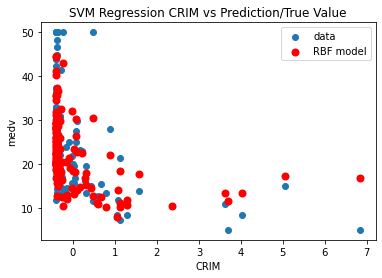

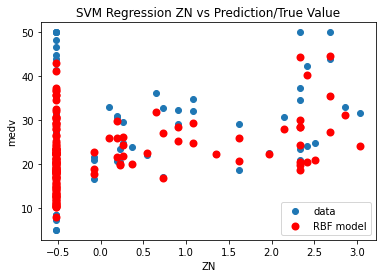

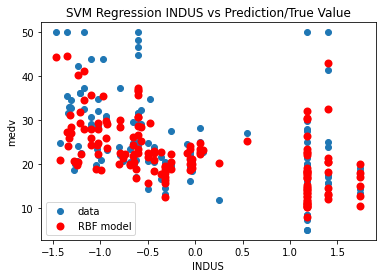

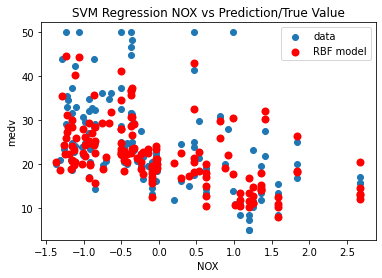

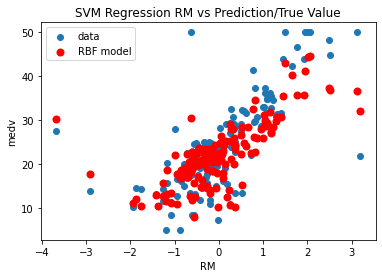

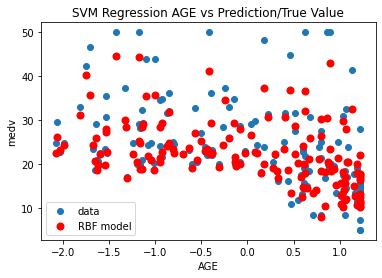

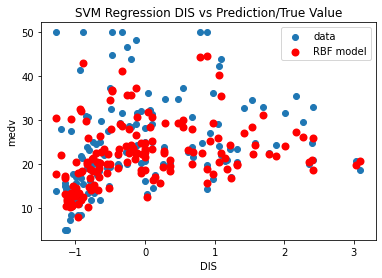

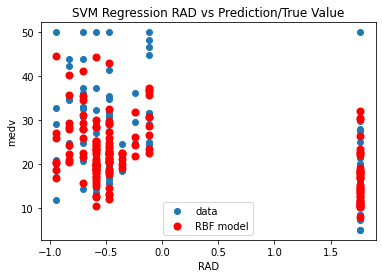

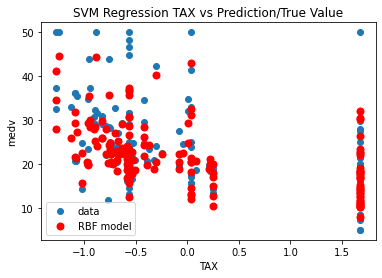

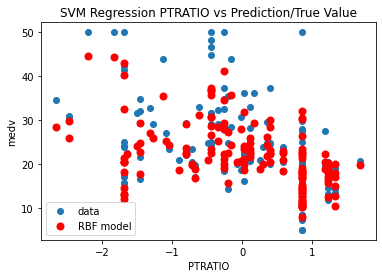

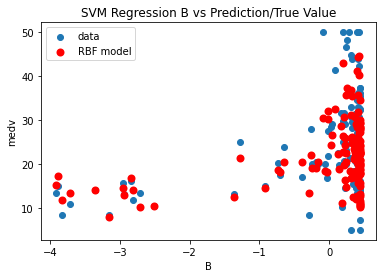

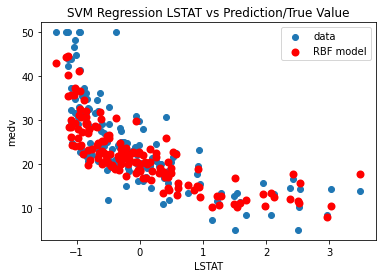

In [46]:
import matplotlib.pyplot as plt

for c in test_feature.columns:
        plt.scatter(test_feature[c],test_target,label="data")
        plt.xlabel(c)
        plt.ylabel("medv")
        plt.scatter(test_feature[c],prediction , color='red', lw=2, label='RBF model')
        plt.legend()
        plt.title("SVM Regression "+ c + " vs Prediction/True Value")
        plt.show()
